In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os

# se supone que estan en la misma carpeta de research osea que no hace falta cambiar el directorio
from mystatistics.mystatistics import new_johansen

ImportError: cannot import name 'new_johansen' from 'mystatistics.mystatistics' (/home/plaavo/QFC/quant/research/mystatistics/mystatistics.py)

In [2]:
datapath='../data/european/daily/abn.csv'
df1 = pd.read_csv(datapath)

datapath='../data/european/daily/aex.csv'
df2 = pd.read_csv(datapath)


In [57]:
# Función que se queda solo con los valores de las series temporales que coinciden en el tiempo
print(df1.shape)
print(df2.shape)

print(df1.head())
print(df2.head())


(255, 8)
(255, 8)
         date       open       high        low      close   volume  dividend  \
0  2017-01-02  21.100000  21.295000  20.945000  21.275000   407919         0   
1  2017-01-03  21.334999  22.070000  21.334999  21.950001  1453872         0   
2  2017-01-04  21.990000  22.135000  21.934999  22.125000  1169976         0   
3  2017-01-05  22.115000  22.280001  22.000000  22.125000  1102774         0   
4  2017-01-06  22.100000  22.250000  22.045000  22.230000   766804         0   

   split  
0      1  
1      1  
2      1  
3      1  
4      1  
         date        open        high         low       close    volume  \
0  2017-01-02  481.160004  487.100006  481.010010  486.369995  35770100   
1  2017-01-03  488.070007  489.910004  487.309998  487.989990  79701500   
2  2017-01-04  489.679993  489.679993  486.510010  487.579987  81563200   
3  2017-01-05  486.500000  488.320007  485.779999  486.929993  81001600   
4  2017-01-06  486.589996  487.339996  485.059998  487.00000

In [11]:
# mergeamos y comprobamos el merge
merge = pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
print(merge.shape)
print(merge.head())

(255, 16)
       date_x     open_x     high_x      low_x    close_x  volume_x  \
0  2017-01-02  21.100000  21.295000  20.945000  21.275000    407919   
1  2017-01-03  21.334999  22.070000  21.334999  21.950001   1453872   
2  2017-01-04  21.990000  22.135000  21.934999  22.125000   1169976   
3  2017-01-05  22.115000  22.280001  22.000000  22.125000   1102774   
4  2017-01-06  22.100000  22.250000  22.045000  22.230000    766804   

   dividend_x  split_x      date_y      open_y      high_y       low_y  \
0           0        1  2017-01-02  481.160004  487.100006  481.010010   
1           0        1  2017-01-03  488.070007  489.910004  487.309998   
2           0        1  2017-01-04  489.679993  489.679993  486.510010   
3           0        1  2017-01-05  486.500000  488.320007  485.779999   
4           0        1  2017-01-06  486.589996  487.339996  485.059998   

      close_y  volume_y  dividend_y  split_y  
0  486.369995  35770100           0        1  
1  487.989990  79701500 

In [15]:
# nos quedamos solo con el close de cada time series

ts = merge[['close_x', 'close_y']]
ts = np.array(ts)

In [42]:
# probamos johansen test

p = 1 # lag
johansen_result = johansen_test(ts, p)

UnboundLocalError: local variable 'r' referenced before assignment

In [39]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_res = coint_johansen(ts, 0, 1)


In [49]:
# analizamos el objeto creado por statsmodels

print(coint_res)
print(coint_res.cvm)
print(coint_res.cvt)
print(coint_res.eig)
print(coint_res.evec)
print(coint_res.lr1)
print(coint_res.lr2)


[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[0.03463013 0.00604148]
[[ 1.39141426 -0.47847861]
 [-0.10793412 -0.01783432]]
[10.44985578  1.53313115]
[8.91672464 1.53313115]


In [53]:
# una vez hemos comprobado que las series temporales cointegran vamos a generar una nueva serie temporal combinandolas que sea mean reverting
# para ello debemos coger los eigen vectors generados por coint_johansen
# vamos a ver que tenemos 2 eigen values con sus eigen vectors aociados
# deberemos escoger los evec asociados al mayor eig
print(coint_res.eig)
print(coint_res.evec)

ponderaciones = coint_res.evec[0]

mr_ts = ts[:,0]*ponderaciones[0] + ts[:,1]*ponderaciones[1]



[0.03463013 0.00604148]
[[ 1.39141426 -0.47847861]
 [-0.10793412 -0.01783432]]


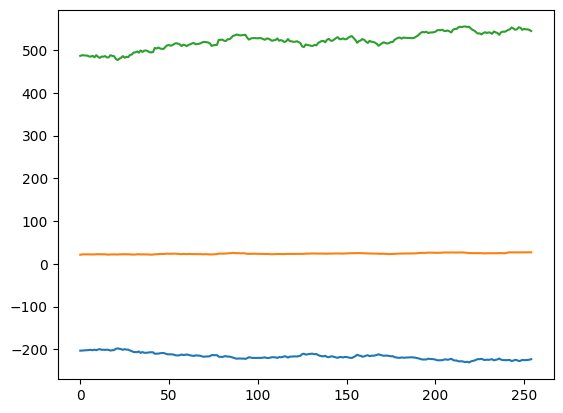

In [56]:
plt.plot(mr_ts)
plt.plot(ts[:,0])
plt.plot(ts[:,1])
